In [1]:
import numpy as np
import pandas as pd

In [15]:
# specify an encoding that can handle non-UTF-8 bytes
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.shape


(5572, 5)

## 1. Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
# drop last 3 unnamed columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')
df.head()



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
#rename columns
df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [33]:
# duplicate values
df.duplicated().sum()

np.int64(403)

In [34]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [35]:
df.shape

(5169, 2)

## 2. EDA

In [36]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

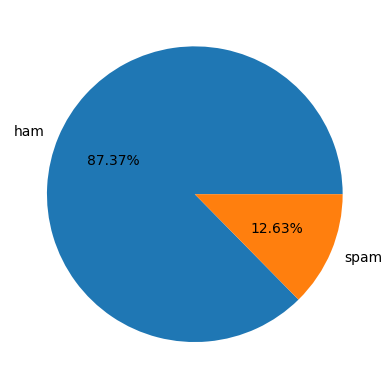

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")
plt.show()

In [70]:
# As we can see that the dataset is imbalanced with more ham messages than spam messages.

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zohaib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


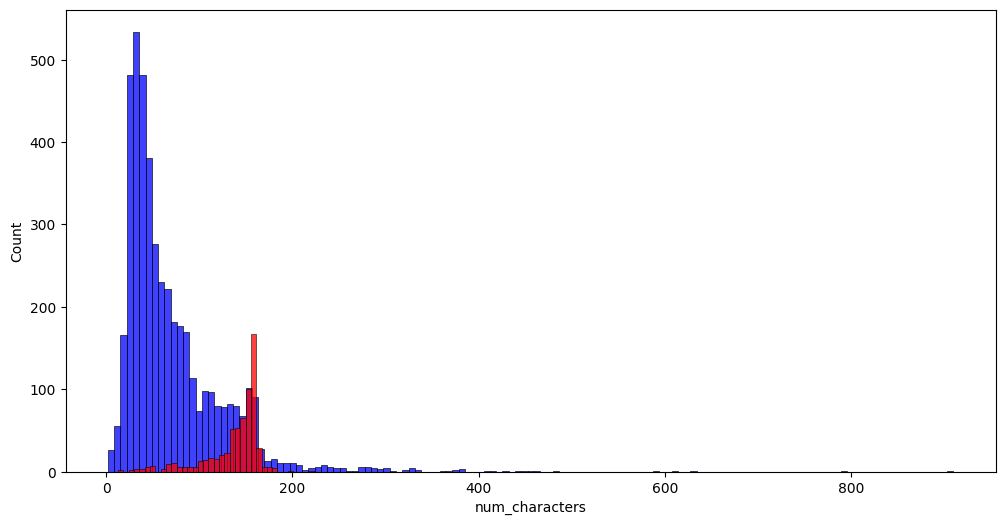

In [49]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

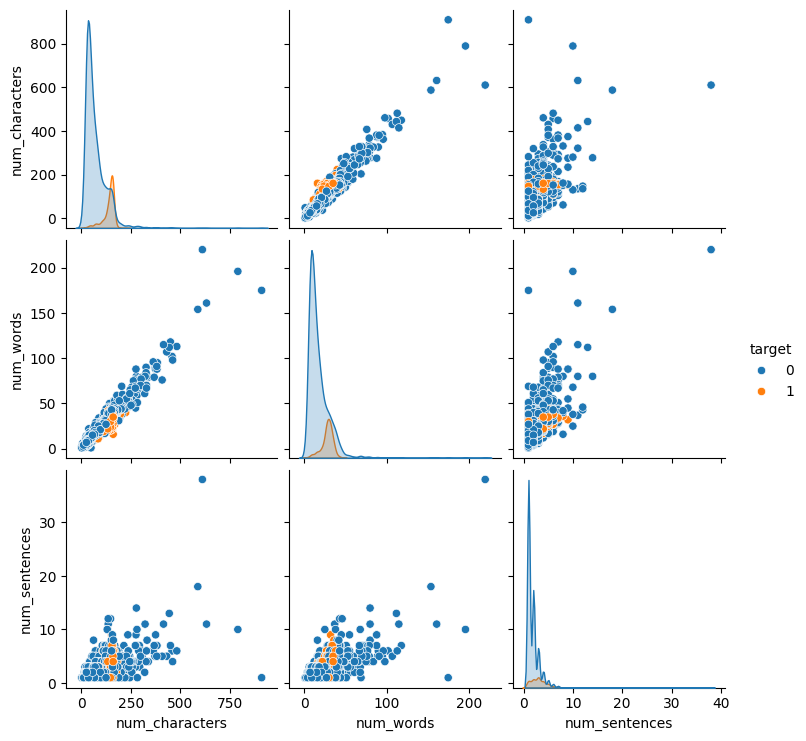

In [50]:
sns.pairplot(df, hue='target')

<Axes: >

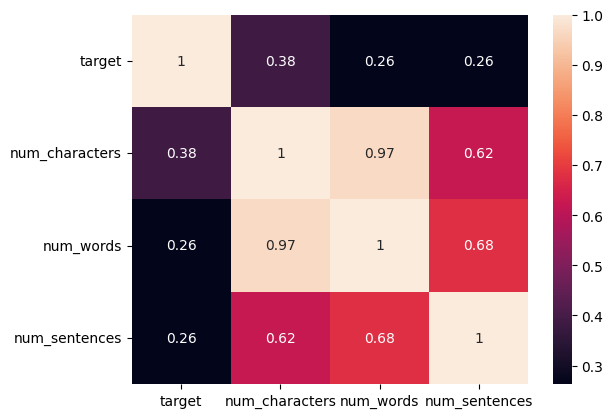

In [52]:
# compute correlation only on numeric columns to avoid trying to convert text to float
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

## 3. Data Preprocessing
      Lower case
      Tokenization
      Removing Special characters
      Removing stop words and punctution
      Stemming

In [55]:
import string
import nltk
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    ps = nltk.PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zohaib\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [60]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf, lives, around, though]"


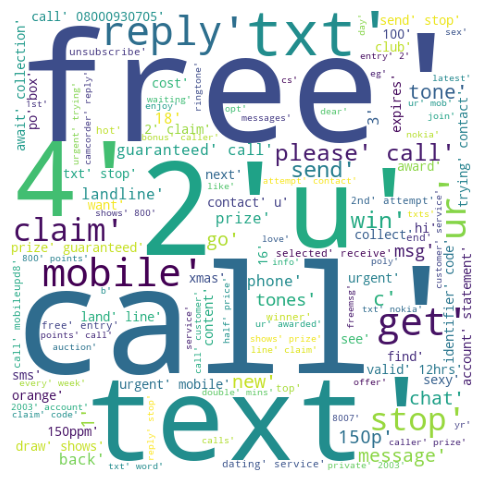

In [65]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

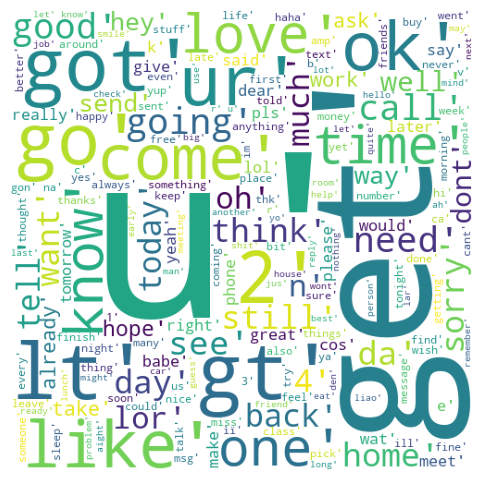

## 4. Model Building

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# ensure transformed_text is a single string per row
def _ensure_string(x):
	if isinstance(x, list):
		return " ".join(x)
	if pd.isna(x):
		return ""
	return str(x)

df['transformed_text'] = df['transformed_text'].apply(_ensure_string)


X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [87]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [88]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8839458413926499
0.5432692307692307
[[801  95]
 [ 25 113]]


In [89]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9738878143133463
1.0
[[896   0]
 [ 27 111]]


In [90]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9816247582205029
0.9917355371900827
[[895   1]
 [ 18 120]]


In [91]:
# we choose tfidf with multinomialNB as it has the best precision score

In [92]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))